In [103]:
# Let's begin our late night python practices with project find outs how much money you spend on Amazon
#I already save an csv file in my local dir
import pandas as pd
df = pd.read_csv('amazon-orders.csv')
print('There are {} rows {} and columns'.format(df.shape[0], df.shape[1]))

There are 59 rows 23 and columns


In [104]:
df.head(5)

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,...,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,04/01/19,112-0000000-0000001,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$35.00,$0.00,$1.93,$0.00,$1.93,$36.93,Your Name,NaN
1,04/01/19,112-0000000-0000002,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$16.99,$0.00,$0.00,$0.00,$0.00,$16.99,Your Name,NaN
2,04/01/19,112-0000000-0000003,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$9.99,$0.00,$0.00,$0.00,$0.00,$9.99,Your Name,NaN
3,04/04/19,112-0000000-0000004,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/05/19,Your Name,1 YOUR STREET,NaN,...,Shipped,UPS(0002),$147.98,$0.00,$8.14,$0.00,$8.14,$156.12,Your Name,NaN
4,04/05/19,112-0000000-0000005,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/07/19,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$14.99,$0.00,$0.00,$0.00,$0.00,$14.99,Your Name,NaN


In [105]:
#from the start we can see that there are several null value in dataset so let's see'
df.isnull().any(axis=0) #from .any(axis = 0) we saw that at least 1 record of data in PON(Purchase order number)
#SAS2(Shipping Address Street 2) and GN(Group Name) have  null value

Order Date                        False
Order ID                          False
Payment Instrument Type           False
Website                           False
Purchase Order Number              True
Ordering Customer Email           False
Shipment Date                     False
Shipping Address Name             False
Shipping Address Street 1         False
Shipping Address Street 2          True
Shipping Address City             False
Shipping Address State            False
Shipping Address Zip              False
Order Status                      False
Carrier Name & Tracking Number    False
Subtotal                          False
Shipping Charge                   False
Tax Before Promotions             False
Total Promotions                  False
Tax Charged                       False
Total Charged                     False
Buyer Name                        False
Group Name                         True
dtype: bool

<h2>Data Cleaning</h2>

In [106]:
df = df.fillna(0) #this give all NaN Valued 0.0
df.head() #As you can see all currency value are stick with dollar sign so its not number
#That is a hard way to deal with number let's see what type of data in all of that cols just to make sure

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,...,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,04/01/19,112-0000000-0000001,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$35.00,$0.00,$1.93,$0.00,$1.93,$36.93,Your Name,0.0
1,04/01/19,112-0000000-0000002,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$16.99,$0.00,$0.00,$0.00,$0.00,$16.99,Your Name,0.0
2,04/01/19,112-0000000-0000003,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$9.99,$0.00,$0.00,$0.00,$0.00,$9.99,Your Name,0.0
3,04/04/19,112-0000000-0000004,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/05/19,Your Name,1 YOUR STREET,0.0,...,Shipped,UPS(0002),$147.98,$0.00,$8.14,$0.00,$8.14,$156.12,Your Name,0.0
4,04/05/19,112-0000000-0000005,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/07/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$14.99,$0.00,$0.00,$0.00,$0.00,$14.99,Your Name,0.0


In [107]:
dfcols = df.columns

In [108]:
for i in dfcols:
    print(i,"is",df[i].dtypes)

Order Date is object
Order ID is object
Payment Instrument Type is object
Website is object
Purchase Order Number is float64
Ordering Customer Email is object
Shipment Date is object
Shipping Address Name is object
Shipping Address Street 1 is object
Shipping Address Street 2 is float64
Shipping Address City is object
Shipping Address State is object
Shipping Address Zip is object
Order Status is object
Carrier Name & Tracking Number is object
Subtotal is object
Shipping Charge is object
Tax Before Promotions is object
Total Promotions is object
Tax Charged is object
Total Charged is object
Buyer Name is object
Group Name is float64


<h3>Subtotal, Shipping charge, Tax Before Promotion, Tax Charged, Total Charged are all object</h3>

In [109]:
df.head()

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,...,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,04/01/19,112-0000000-0000001,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$35.00,$0.00,$1.93,$0.00,$1.93,$36.93,Your Name,0.0
1,04/01/19,112-0000000-0000002,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$16.99,$0.00,$0.00,$0.00,$0.00,$16.99,Your Name,0.0
2,04/01/19,112-0000000-0000003,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$9.99,$0.00,$0.00,$0.00,$0.00,$9.99,Your Name,0.0
3,04/04/19,112-0000000-0000004,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/05/19,Your Name,1 YOUR STREET,0.0,...,Shipped,UPS(0002),$147.98,$0.00,$8.14,$0.00,$8.14,$156.12,Your Name,0.0
4,04/05/19,112-0000000-0000005,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/07/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$14.99,$0.00,$0.00,$0.00,$0.00,$14.99,Your Name,0.0


In [110]:
#replace $ with "" and change type to float
df['Subtotal'] = df['Subtotal'].str.replace("$", "").astype(float)
df['Shipping Charge'] = df['Shipping Charge'].str.replace("$", "").astype(float)
df['Tax Before Promotions'] = df['Tax Before Promotions'].str.replace("$", "").astype(float)
df['Total Promotions'] = df['Total Promotions'].str.replace("$", "").astype(float)
df['Tax Charged'] = df['Tax Charged'].str.replace("$", "").astype(float)
df['Total Charged'] = df['Total Charged'].str.replace("$", "").astype(float)

In [111]:
for i in dfcols:
    print(i,"is",df[i].dtypes)

Order Date is object
Order ID is object
Payment Instrument Type is object
Website is object
Purchase Order Number is float64
Ordering Customer Email is object
Shipment Date is object
Shipping Address Name is object
Shipping Address Street 1 is object
Shipping Address Street 2 is float64
Shipping Address City is object
Shipping Address State is object
Shipping Address Zip is object
Order Status is object
Carrier Name & Tracking Number is object
Subtotal is float64
Shipping Charge is float64
Tax Before Promotions is float64
Total Promotions is float64
Tax Charged is float64
Total Charged is float64
Buyer Name is object
Group Name is float64


In [112]:
df.head()

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,...,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,04/01/19,112-0000000-0000001,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),35.00,0.0,1.93,0.0,1.93,36.93,Your Name,0.0
1,04/01/19,112-0000000-0000002,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),16.99,0.0,0.00,0.0,0.00,16.99,Your Name,0.0
2,04/01/19,112-0000000-0000003,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),9.99,0.0,0.00,0.0,0.00,9.99,Your Name,0.0
3,04/04/19,112-0000000-0000004,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/05/19,Your Name,1 YOUR STREET,0.0,...,Shipped,UPS(0002),147.98,0.0,8.14,0.0,8.14,156.12,Your Name,0.0
4,04/05/19,112-0000000-0000005,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/07/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),14.99,0.0,0.00,0.0,0.00,14.99,Your Name,0.0


In [113]:
df.describe()

,Purchase Order Number,Shipping Address Street 2,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Group Name
count,59.0,59.0,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.0
mean,0.0,0.0,29.461525,0.354068,0.891695,0.576271,0.891695,30.131017,0.0
std,0.0,0.0,35.201502,1.391525,1.930481,2.443876,1.930481,36.422732,0.0
min,0.0,0.0,0.520000,0.000000,0.000000,0.000000,0.000000,1.040000,0.0
25%,0.0,0.0,9.970000,0.000000,0.000000,0.000000,0.000000,10.545000,0.0
50%,0.0,0.0,14.990000,0.000000,0.000000,0.000000,0.000000,15.950000,0.0
75%,0.0,0.0,36.785000,0.000000,0.830000,0.000000,0.830000,37.005000,0.0
max,0.0,0.0,199.990000,7.960000,11.000000,15.000000,11.000000,210.990000,0.0


<h3>Calculate the total amount </h3>

In [114]:
total_amount_spended = df['Total Charged'].sum()
print("My total amount is " + str(round(total_amount_spended)))

My total amount is 1778


<h3>Calculate how much I paid in tax sales</h3>

In [115]:
df['Tax Charged'].sum() # + can concate str with str not str with numeric/float
print("I paid about " +str(round(df['Tax Charged'].sum()))+" dollars for tax sales")

I paid about 53 dollars for tax sales


<p>As you can see in Tax charged cols there are several cols with 0.00 taxes so what is the overall tax rates?</p>

In [116]:
df['Tax Charged'].sum()/df['Total Charged'].sum()
print("The overall tax charged is " + str(df['Tax Charged'].sum()/df['Total Charged'].sum()) + " or about "+str(round((df['Tax Charged'].sum()/df['Total Charged'].sum())*100))+ "%")

The overall tax charged is 0.02959392033660904 or about 3%


<h3>Analyzing Amazon Spending Over Time</h3>

<p>As I recall our order date cols is not datetime format so let's check on that </p>

In [117]:
for i in dfcols:
    if i == "Order Date":
        print(i + " is", df[i].dtypes)

Order Date is object


In [118]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,...,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,2019-04-01,112-0000000-0000001,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),35.00,0.0,1.93,0.0,1.93,36.93,Your Name,0.0
1,2019-04-01,112-0000000-0000002,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),16.99,0.0,0.00,0.0,0.00,16.99,Your Name,0.0
2,2019-04-01,112-0000000-0000003,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),9.99,0.0,0.00,0.0,0.00,9.99,Your Name,0.0
3,2019-04-04,112-0000000-0000004,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/05/19,Your Name,1 YOUR STREET,0.0,...,Shipped,UPS(0002),147.98,0.0,8.14,0.0,8.14,156.12,Your Name,0.0
4,2019-04-05,112-0000000-0000005,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/07/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),14.99,0.0,0.00,0.0,0.00,14.99,Your Name,0.0


In [119]:
print(df['Order Date'].dtypes)

datetime64[ns]


In [120]:
%matplotlib inline

<AxesSubplot:xlabel='Order Date'>

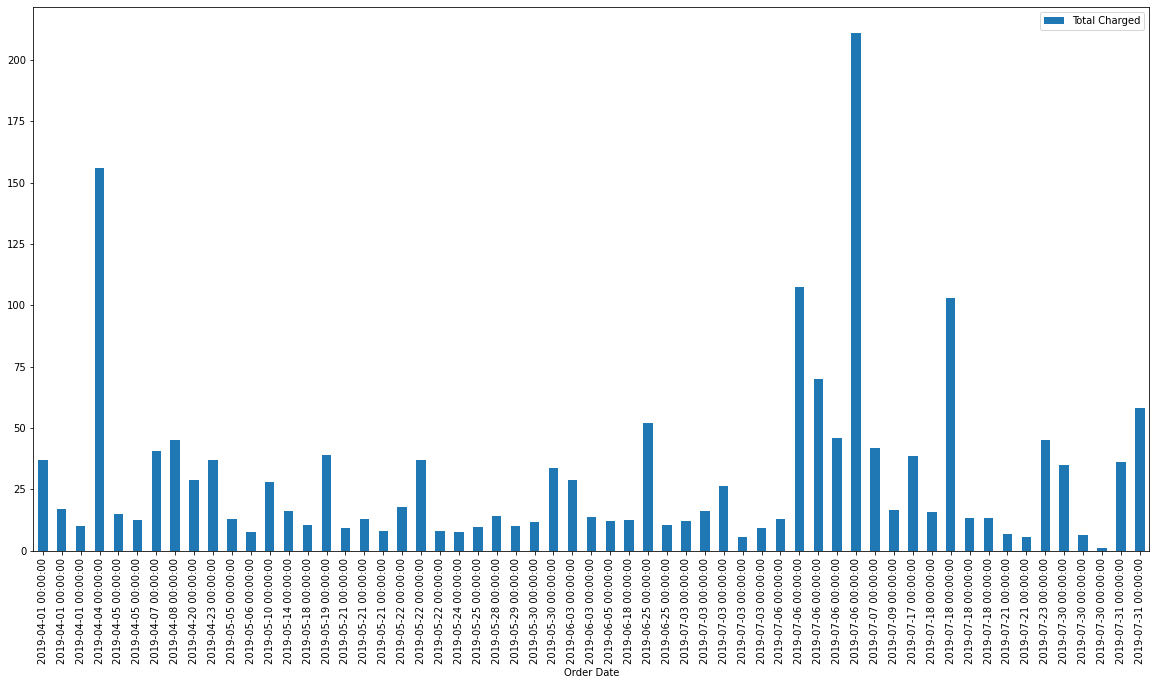

In [121]:
df.plot.bar(x = 'Order Date', y = 'Total Charged', rot = 90, figsize = (20,10))

<p>Much easier to read but take a look at first 3 bar chart , Its on the same day which is "2019-04-01"</p>
<p>This happens when the order date is not group together</p>

In [122]:
dailys_order = df.groupby('Order Date').sum()['Total Charged']
dailys_order

Order Date
2019-04-01     63.91
2019-04-04    156.12
2019-04-05     27.64
2019-04-07     40.63
2019-04-08     44.99
2019-04-20     28.80
2019-04-23     37.08
2019-05-05     12.99
2019-05-06      7.60
2019-05-10     27.99
2019-05-14     16.16
2019-05-18     10.50
2019-05-19     38.89
2019-05-21     30.42
2019-05-22     62.74
2019-05-24      7.67
2019-05-25      9.80
2019-05-28     13.95
2019-05-29      9.99
2019-05-30     45.38
2019-06-03     42.87
2019-06-05     12.26
2019-06-18     12.64
2019-06-25     62.58
2019-07-03     69.57
2019-07-06    447.36
2019-07-07     41.97
2019-07-09     16.46
2019-07-17     38.50
2019-07-18    145.88
2019-07-21     12.61
2019-07-23     45.29
2019-07-30     42.33
2019-07-31     94.16
Name: Total Charged, dtype: float64

In [123]:
dailys_order.mean()

52.28617647058824

<AxesSubplot:xlabel='Order Date'>

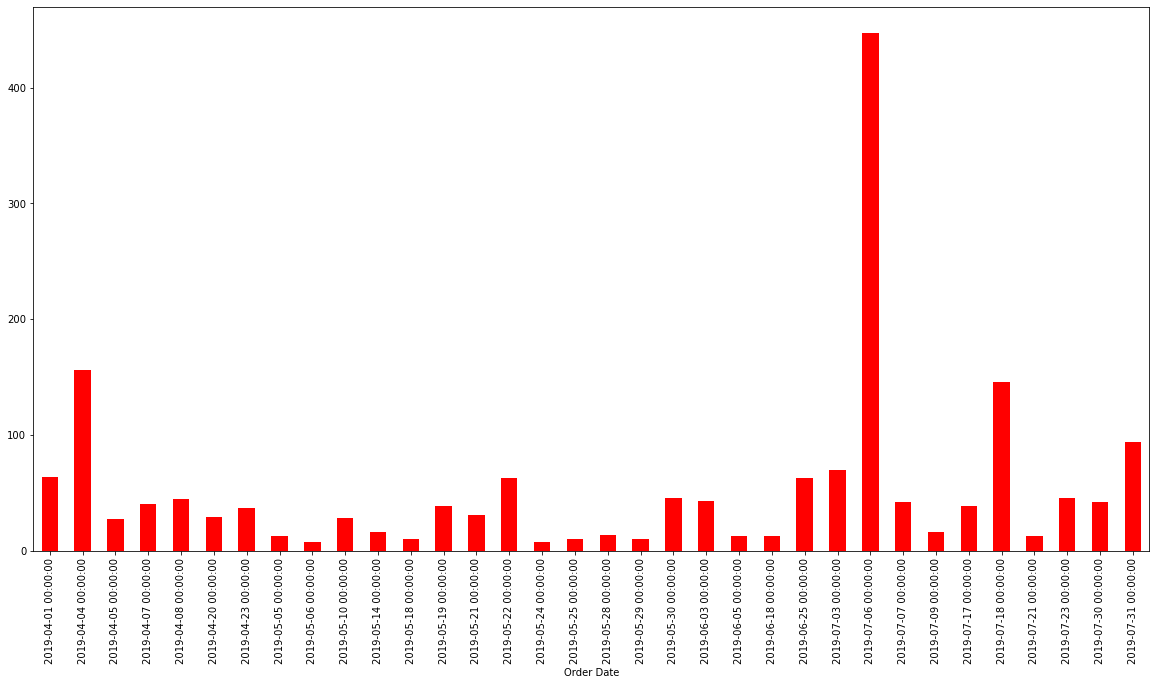

In [124]:
dailys_order.plot.bar(figsize = (20, 10), color = 'red')

<h5>We done so many things up there so after all that can you answer these question?</h5>
<p>How much I spent on Amazon during this period?</p>
<p>What was my highest, lowest, and average order?</p>
<p>How much tax I paid, and the effective sales tax rate I paid?</p>
<p>On which days I spent the most of my money?</p>

<h4>Let's building a short quize from what I learn on freecodecamp.org on python_full Course for Beginner</h4>

<p>First, let's create a question prompt this is where your question and answer will show you</p>

In [125]:
question_prompt = ["How much I spent on Amazon during this period?\n(a) 7.60\n(b) 9.99\n(c) 94.16"]

In [126]:
print(question_prompt[0]) #As you can see this works so lets do the rest 

How much I spent on Amazon during this period?
(a) 7.60
(b) 9.99
(c) 94.16


In [127]:
question_prompt = ["How much I spent on Amazon during this period?\n(a) 7.60\n(b) 9.99\n(c) 94.16",
                  "What was my highest, lowest, and average orders?\n(a) highest:552.14, lowest:43, average:12\n(b) highest:420.36, lowest:6.60, average:52.28\n(c) highest:477.36, lowest:7.60, average:52.28",
                  "How much tax I paid, and the effective sale tax rate I paid?\n(a) tax:53, tax rate: 3%\n(b) tax:22, tax rate: 2%\n(c) tax: 42, tax rate: 3%",
                  "On Which days I spent the most of my money?\n(a) 7/6/2019 \n(b) 12/4/2019 \n(c) 5/2/2019"]

In [128]:
print(question_prompt[0])
print("\n")
print(question_prompt[1])
print("\n")
print(question_prompt[2])
print("\n")
print(question_prompt[3])

How much I spent on Amazon during this period?
(a) 7.60
(b) 9.99
(c) 94.16


What was my highest, lowest, and average orders?
(a) highest:552.14, lowest:43, average:12
(b) highest:420.36, lowest:6.60, average:52.28
(c) highest:477.36, lowest:7.60, average:52.28


How much tax I paid, and the effective sale tax rate I paid?
(a) tax:53, tax rate: 3%
(b) tax:22, tax rate: 2%
(c) tax: 42, tax rate: 3%


On Which days I spent the most of my money?
(a) 7/6/2019 
(b) 12/4/2019 
(c) 5/2/2019


In [129]:
#let's define a class for our question
class question:
    def __init__(self, prompt, answer): #class consist of itself, a prompt and answer
        self.prompt = prompt
        self.answer = answer

In [130]:
#let's give each question an answer by create a list named questions and give its value to 
questions = [question(question_prompt[0], "a"),
             question(question_prompt[1], "b"),
            question(question_prompt[2], "a"),
            question(question_prompt[3], "a")]

In [131]:
def run_test(questions):
    score = 0
    for question in questions:
        answer = input(question.prompt)
        if answer == question.answer:
            score = score + 1
    print("Hey you got " + str(score) + "/" + str(len(questions)))

In [132]:
run_test(questions)

How much I spent on Amazon during this period?
(a) 7.60
(b) 9.99
(c) 94.16ฟ
What was my highest, lowest, and average orders?
(a) highest:552.14, lowest:43, average:12
(b) highest:420.36, lowest:6.60, average:52.28
(c) highest:477.36, lowest:7.60, average:52.28a
How much tax I paid, and the effective sale tax rate I paid?
(a) tax:53, tax rate: 3%
(b) tax:22, tax rate: 2%
(c) tax: 42, tax rate: 3%v
On Which days I spent the most of my money?
(a) 7/6/2019 
(b) 12/4/2019 
(c) 5/2/2019b
Hey you got 0/4


<h4>Let's take this project future</h4>
<p></p>

<p> - Look into other arguments to add to the plot code to further beautify the graph.</p><br>
<p> - Add another bar to each day for 'Tax Charged' to each day.<p><br>
<p> - Break your spending down by month, or year, instead of day.</p><br>
<p> - Download your Items order report on Amazon and do some analysis on what Categories of items you buy most, or spend the most on. (This will require reworking some of your existing code since the Items report has a lot more columns).</p><br>
<p> - Find a way to get every day (even days with no orders) into your data set so that you can more easily visualize your spending over time.</p><br>
<p> - What other websites to you shop on? See if they allow you to access any of your data.</p><br>

<h4>Look into other arguments to add to the plot code to furture beautify the graph</h4>

In [133]:
df.head()

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,...,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,2019-04-01,112-0000000-0000001,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),35.00,0.0,1.93,0.0,1.93,36.93,Your Name,0.0
1,2019-04-01,112-0000000-0000002,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),16.99,0.0,0.00,0.0,0.00,16.99,Your Name,0.0
2,2019-04-01,112-0000000-0000003,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),9.99,0.0,0.00,0.0,0.00,9.99,Your Name,0.0
3,2019-04-04,112-0000000-0000004,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/05/19,Your Name,1 YOUR STREET,0.0,...,Shipped,UPS(0002),147.98,0.0,8.14,0.0,8.14,156.12,Your Name,0.0
4,2019-04-05,112-0000000-0000005,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/07/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),14.99,0.0,0.00,0.0,0.00,14.99,Your Name,0.0


<AxesSubplot:xlabel='Order Date'>

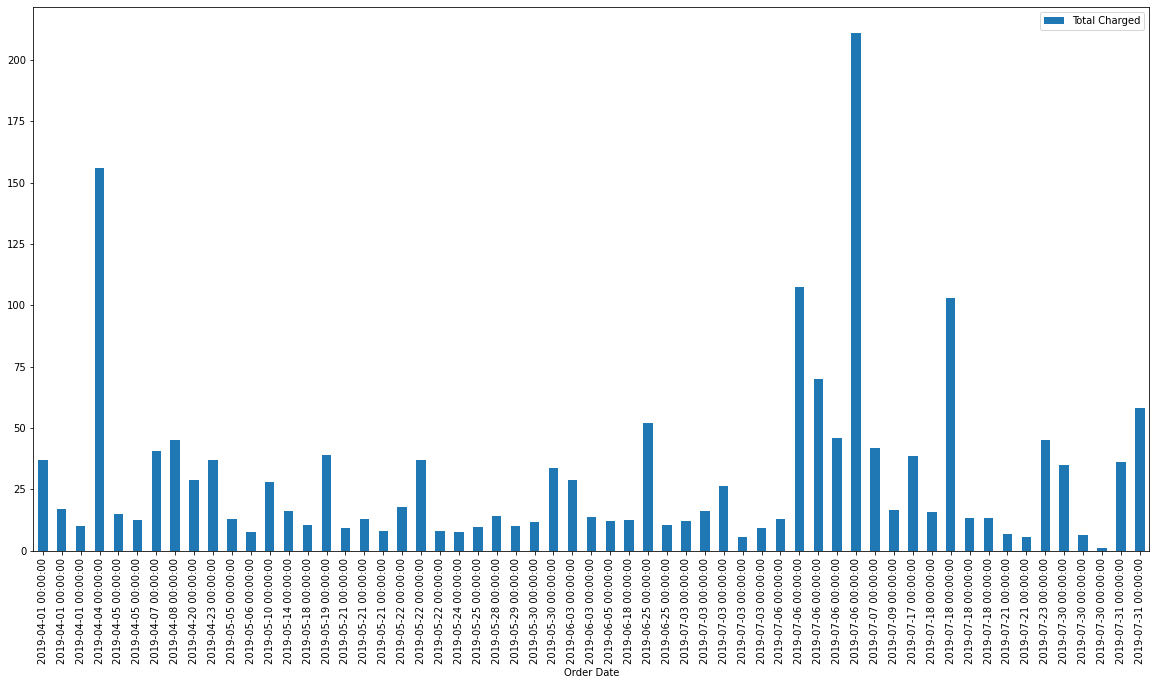

In [134]:
df.plot.bar(x = 'Order Date', y = 'Total Charged', rot = 90, figsize = (20,10))

In [135]:
import matplotlib.pyplot as plt

<Figure size 1440x720 with 0 Axes>

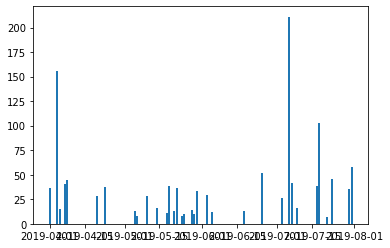

<Figure size 1440x720 with 0 Axes>

In [136]:
plt.bar(df['Order Date'],df['Total Charged'])
plt.figure(figsize = (20, 10))

In [137]:
print(df.shape)

(59, 23)


In [138]:
df = df.groupby('Order Date').sum()['Total Charged']
df.head()

Order Date
2019-04-01     63.91
2019-04-04    156.12
2019-04-05     27.64
2019-04-07     40.63
2019-04-08     44.99
Name: Total Charged, dtype: float64

In [141]:
plt.bar(df['Order Date'], df)

KeyError: 'Order Date'